In [1]:
# dev mode
import sys

# add path
sys.path.insert(0, "../../code/src/")

# interactively load the module
%load_ext autoreload
%autoreload 2

In [2]:
from hierarchical_grouping.file_reader import BinaryPolygonFileReader, test_load_module
from hierarchical_grouping.utils import plot_two_polys
import shapely.plotting
import networkx as nx

'''
    Name,            number of sets
    data_auerberg,              796
    data_dottendorf,            871
    data_duisdorf,             2127
    data_endenich,             1060
    data_zentrum,               160
'''
file_path = "../data/data_auerberg"
reader = BinaryPolygonFileReader(file_path)
set_id, polys1, polys2 = reader.read_next_set()

In [38]:
set_id, polys1, polys2 = reader.read_next_set()
print("set_id: ", set_id)
print("Length polys1: ", len(polys1))
print("Length polys2: ", len(polys2))

set_id:  8
Length polys1:  4
Length polys2:  5


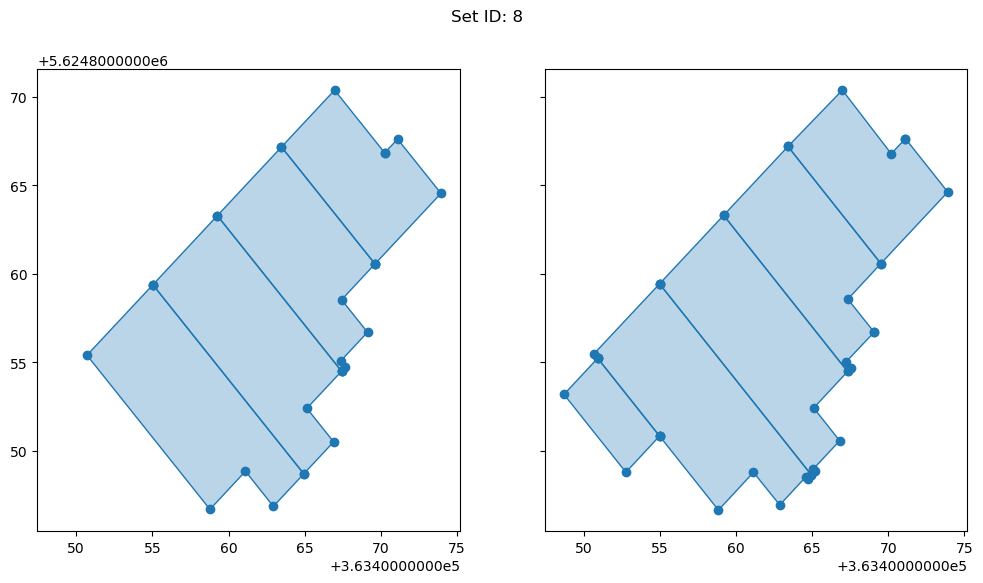

In [39]:
plot_two_polys(polys1, polys2, set_id)

# 1. Edges generation/initialization
[networkx](https://networkx.org/documentation/stable/tutorial.html)  
[Polygon](https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html)  


# 1.1 Centroid

In [5]:
for poly in polys2:
    print(poly.centroid)
    
# create two graph and add nodes along with their centroid. Would be nice to add centroid
# https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html

POINT (363390.01574335207 5624000.181818168)


# 1.2 Init Nodes.

In [40]:
import networkx as nx
G = nx.Graph()

In [41]:
c = 0
for poly in polys2:
    node_attributes = {
        "poly": poly,
        # "centroid": poly.centroid,
        # "x": poly.centroid.x,
        # "y": poly.centroid.y,
    }
    node = (c, node_attributes)
    c = c + 1
    G.add_nodes_from([node])

In [42]:
for i in range(len(polys2)):
    print(G.nodes[i])

{'poly': <POLYGON ((363471.122 5624867.643, 363470.193 5624866.788, 363466.985 562487...>}
{'poly': <POLYGON ((363450.928 5624855.227, 363448.715 5624853.185, 363452.78 5624848...>}
{'poly': <POLYGON ((363454.988 5624859.434, 363464.959 5624848.623, 363465.19 5624848...>}
{'poly': <POLYGON ((363454.989 5624850.83, 363458.853 5624846.645, 363461.152 5624848...>}
{'poly': <POLYGON ((363469.072 5624856.703, 363467.345 5624858.567, 363469.512 562486...>}


In [43]:
G.nodes.data()

NodeDataView({0: {'poly': <POLYGON ((363471.122 5624867.643, 363470.193 5624866.788, 363466.985 562487...>}, 1: {'poly': <POLYGON ((363450.928 5624855.227, 363448.715 5624853.185, 363452.78 5624848...>}, 2: {'poly': <POLYGON ((363454.988 5624859.434, 363464.959 5624848.623, 363465.19 5624848...>}, 3: {'poly': <POLYGON ((363454.989 5624850.83, 363458.853 5624846.645, 363461.152 5624848...>}, 4: {'poly': <POLYGON ((363469.072 5624856.703, 363467.345 5624858.567, 363469.512 562486...>}})

# 1.3 Edges gen based on distance only.

In [26]:
for i in range(4):
    j = i + 1
    for j in range(j, 4):
        print(i, j)
    # print(G.nodes[i])
    # https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/
    # https://www.geeksforgeeks.org/what-is-minimum-spanning-tree-mst/

0 1
0 2
0 3
1 2
1 3
2 3


In [44]:
for i in range(len(polys1)):
    j = i + 1
    for j in range(j, len(polys1)):
        dist = G.nodes[i]['poly'].distance(G.nodes[j]['poly'])
        dist_centroid = G.nodes[i]['poly'].centroid.distance(G.nodes[j]['poly'].centroid)
        # print('i', G.nodes[i]['poly'].centroid)
        # print('j', G.nodes[j]['poly'].centroid)
        print(i, j, dist_centroid)
        # G.add_edge(i, j, weight= )
    # print(G.nodes[i])
# sqrt((363425.4165-363435.3019)**2 + ( 5624825.2918-5624834.6101)**2)

0 1 21.529702979486025
0 2 11.5759134424932
0 3 17.020749679241444
1 2 10.596095169194166
1 3 5.639548776165816
2 3 5.49629873829403


# 1.3 MST.